# Ejemplo Bifurcación a Infinito

Veamos el problema

$$
-\Delta u =\lambda u+x^2\\
u(0)=u(1)=0
$$

para el dominio $[0,1]$, es sabido que el valor principal del operador Laplaciano con condición de borde cero, es $\pi^2$, veamos que en este punto ocurre la bifurcación.


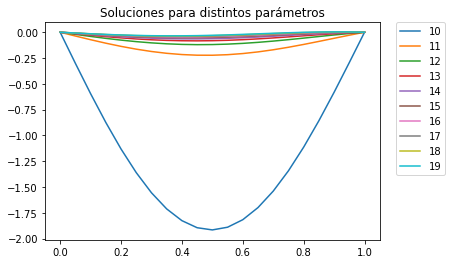

In [18]:
from fenics import *
import numpy as np
import matplotlib.pyplot as plt
import math
from math import log
import pylab



# definimos la partición
mesh = IntervalMesh(20, 0, 1)

# definir base de Lagrange de polinomios de grado 2.
V = FunctionSpace(mesh, "CG", 2)




# definir las condiciones de borde  
    
u_L = Constant(0) 


def boundary_L(x, on_boundary):
    tol = 1E-14
    return on_boundary and near(x[0], 0, tol)


bc_L = DirichletBC(V, u_L, boundary_L)   
    
u_R  = Constant(0) 

def boundary_R(x, on_boundary):
    tol = 1E-14
    return on_boundary and near(x[0], 1, tol)


bc_R = DirichletBC(V, u_R, boundary_R)


bcs = [bc_L, bc_R]





# Definimos arreglos para estudiar la norma
x = np.arange(19)
y =np.arange(19)

    
    
    
    

    
for i in range(1,20):


    # Definir variables
    u = TrialFunction(V)
    v = TestFunction(V)
    
    
 
 #Definir parte derecha y formulación variacional

 #Si queremos -u''=\lambda u+x^2
    f = Expression('x[0]*x[0]*x[0]', degree=2)
    
 #Si queremos -u''=\lambda u+1
    #f=Constant(1)
    
    
   
    a = inner(grad(u), grad(v))*dx -i*inner(u,v)*dx
    L = f*v*dx

    
    
    #resolver la formulación variacional
    u = Function(V)
    solve(a == L, u, bcs)
    
    max=u(0.6)
    
    
    
    #llenar los arreglos
    x[i-1]=i
    y[i-1]=abs(max)
  
 
        
   
    
    
    
    if i>9 : 
        plot(u, title='Soluciones para distintos parámetros', label=str(i))
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        



Veamos en el diagrama de bifurcaciones el comportamiento de la norma infinito en una cercanía de $\pi^2$

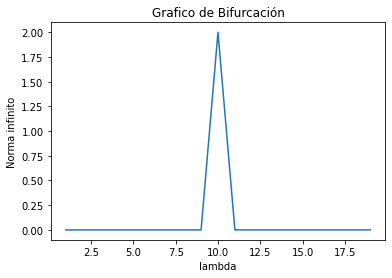

In [14]:
plt.plot(x,y)
plt.xlabel('lambda')
plt.ylabel('Norma infinito')
plt.title('Grafico de Bifurcación')
plt.show()

